# VOC Data Analysis

This notebook contains the analysis of three VOC datasets to showcase analytical capabilities.

## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Breath Biopsy® OMNI® – Example Dataset

Data extracted from https://www.owlstonemedical.com/downloads/breath-biopsy-omni-dataset/

### Load data

In [32]:
omni_df = pd.read_csv(
    'Data/OMNI Example Data/Breath Biopsy OMNI example dataset.csv', encoding='unicode_escape')
omni_df.head()

,Sample,Tags,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 2649.1,Feature 2650.1,Feature 2651.1,Feature 2652.1,Feature 2653.1,Feature 2654.1,Feature 2655.1,Feature 2656.1,Feature 2657.1,Feature 2658.1
0,NaN,Name,Peak@1.631,Peak@1.636,Peak@1.640,Peak@1.640,"Cyclotetrasiloxane, octamethyl-",Peak@1.645,n-Hexane,Sulfur dioxide,...,Octacosane,Triphenylphosphine oxide,"4,4-Dimethyl-1-hexene",Heptacosane,"Pentane, 2,2-dimethyl-","1,4-Benzenedicarboxylic acid, bis(2-ethylhexyl...",Peak@41.300,Squalene,Tridecane,Heptacosane
1,NaN,RT [min],1.631,1.636,1.64,1.64,1.642,1.649,1.654,1.672,...,39.309,39.881,40.736,40.745,40.747,41.265,41.296,41.457,42.514,44.661
2,Breath v1,Area: 9684_14_742525_742533_14.raw (F2),NaN,166465,147540,NaN,842232,NaN,851317,1387296,...,0.103359719,0.103042666,0.046605493,0.10441031,0.04883203,0.0975084,0.066842853,0.00695915,0.25392772,0.325888775
3,Breath v4,Area: 9684_24_741931_742937_24.raw (F5),NaN,NaN,139324,NaN,571682,271335,843059,2560427,...,0.211885243,0.105913683,0.099332617,0.178123082,0.085369204,0.159792082,0.125330344,NaN,0.117369883,0.187566354
4,Breath v2,Area: 9684_30_762790_350749_30.raw (F7),NaN,183706,162169,NaN,965952,NaN,1208287,NaN,...,0.115181953,0.066891511,0.046309683,0.107611218,0.044432246,0.070320186,0.069750564,0.007421719,NaN,0.149357502


In [33]:
print("total number of breath samples is : {}".format(
      len(omni_df[omni_df['Sample'].str.contains('Breath', case=False, na=False)])))

print("total number of blank samples is : {}".format(
      len(omni_df[omni_df['Sample'].str.contains('Blank', case=False, na=False)])))

total number of breath samples is : 57
total number of blank samples is : 57


### Filter ‘on-breath’ compounds

In [86]:
# creathe breath and blanks df
omni_df_breath = omni_df[omni_df['Sample'].str.contains(
    'Breath', case=False, na=False)].drop(['Sample', 'Tags'], axis=1).apply(pd.to_numeric, errors='coerce')

omni_df_blanks = omni_df[omni_df['Sample'].str.contains(
    'Blank', case=False, na=False)].drop(['Sample', 'Tags'], axis=1).apply(pd.to_numeric, errors='coerce')

# remove Signals of 100,000 or less

omni_df_breath = omni_df_breath[omni_df_breath >= 100000]

# create metrics and filter based on mean+3*std of blanks

omni_df_blanks_st = omni_df_blanks.mean()+omni_df_blanks.std()*3

omni_df_breath_st = omni_df_breath.mean()

omni_df_comp = omni_df_breath_st[omni_df_breath_st >
                                 omni_df_blanks_st].reset_index()

omni_df_breath_filtered = omni_df_breath[omni_df_breath.columns[omni_df_breath.columns.isin(
    omni_df_comp['index'])]]

omni_df_breath_filtered.head()

,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Feature 29,Feature 31,...,Feature 2545,Feature 2546,Feature 2555,Feature 2557,Feature 2561,Feature 2568,Feature 2571,Feature 2575,Feature 2578,Feature 2636
2,137590.0,306809.0,558638.0,3641748.0,NaN,574357.0,4479892.0,1120632.0,1456746,NaN,...,NaN,2411631.0,2738598.0,NaN,2493501.0,NaN,645578.0,1203159.0,1097956.0,40840176
3,NaN,1200806.0,3562409.0,4597294.0,237519.0,2155791.0,127871434.0,12601506.0,1839504,NaN,...,1126536.0,4500085.0,3851504.0,3926126.0,2074927.0,NaN,1116587.0,912961.0,1026879.0,42496919
4,NaN,2565235.0,7693637.0,3408666.0,555990.0,553501.0,269042480.0,27248753.0,587177,NaN,...,2106553.0,6833926.0,6815507.0,6822260.0,1674656.0,264986.0,1113486.0,814908.0,1309457.0,43950339
5,214649.0,452892.0,816866.0,8588400.0,214649.0,1009360.0,9132808.0,1374554.0,2343388,400661.0,...,856838.0,NaN,NaN,3678853.0,662229.0,145707.0,136279.0,276717.0,806171.0,18285202
6,NaN,694210.0,1319176.0,7641449.0,336946.0,1566102.0,13472934.0,2148697.0,1527543,NaN,...,NaN,3468242.0,NaN,3916702.0,1452196.0,185117.0,235513.0,423299.0,1021787.0,30109878


In [90]:
print("total number of features detected on breath that have more than 100000 \n \
      and an average of more than mean + 3 * std of blanks is : {}".format(
      len(omni_df_breath_filtered.columns)))

total number of features detected on breath that have more than 100000 
       and an average of more than mean + 3 * std of blanks is : 515


### Plots and insights

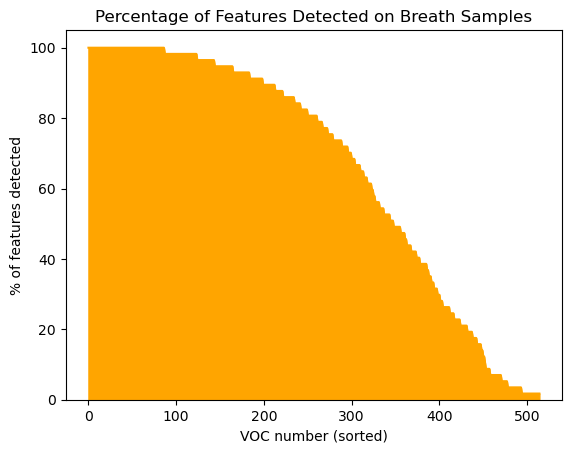

In [87]:
omni_df_ss_na = omni_df_breath_filtered.notna().sum().sort_values(ascending=False).reset_index(
    drop=True)*100/len(omni_df_breath_filtered)
omni_df_ss_na.plot(kind='area', color='orange')
plt.title('Percentage of Features Detected on Breath Samples')
plt.ylabel('% of features detected')
plt.xlabel('VOC number (sorted)')
plt.show()

Over 350 VOCs appear 50% of the time after filtering.

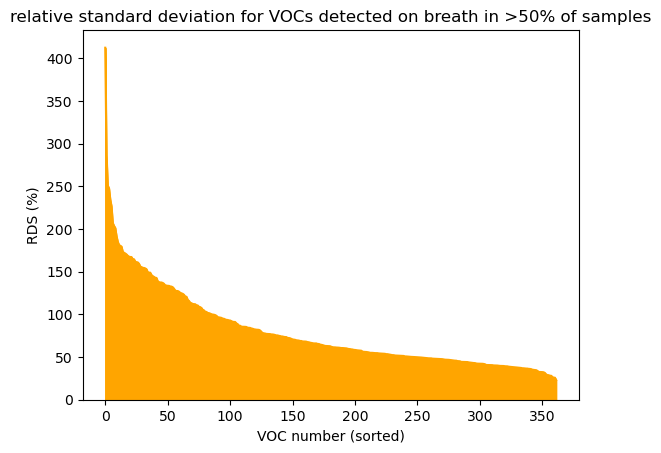

In [81]:
# calculate % of not na values per feature
omni_df_ss_na2 = omni_df_breath_filtered.notna().sum()*100 / \
    len(omni_df_breath_filtered)

# get features with more than 50%

omni_df_ss_na2 = omni_df_ss_na2[omni_df_ss_na2 >= 50].reset_index()

# drop features with less than 50%

omni_df_ss_rsd = omni_df_breath_filtered[omni_df_breath_filtered.columns[omni_df_breath_filtered.columns.isin(
    omni_df_ss_na2['index'])]]

# calculate relative standard deviation (RSD).

omni_df_ss_rsd_C = omni_df_ss_rsd.std(
    skipna=True)*100/omni_df_ss_rsd.mean(skipna=True)

# sort and plot

omni_df_ss_rsd_C = omni_df_ss_rsd_C.sort_values(
    ascending=False).reset_index(drop=True)

omni_df_ss_rsd_C.plot(kind='area', color='orange')

plt.title(
    'relative standard deviation for VOCs detected on breath in >50% of samples')

plt.ylabel('RDS (%)')

plt.xlabel('VOC number (sorted)')

plt.show()

In [93]:
print("The median inter-subject RSD across these VOCs was {}".format(omni_df_ss_rsd_C.median()))

The median inter-subject RSD across these VOCs was 62.381548527431804


## Pulmonary Disease Dataset

Data extracted from https://www.nature.com/articles/s41597-024-03052-2#Sec9

### Load data